# Data Mining Assignment
Case Study On Classification

Nishchal Verma
 20030242043

### 1. Loading the Dataset

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.naive_bayes import GaussianNB

In [168]:
loan_data=pd.read_csv("/Users/nishchal/Downloads/loan data.csv",delimiter=",")

In [104]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Statistics and Dataset Description

In [105]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [107]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Summary of Missing Values

In [108]:
missing_data = pd.DataFrame({'total_missing': loan_data.isnull().sum(), 'perc_missing': (loan_data.isnull().sum()/614)*100})
missing_data

,total_missing,perc_missing
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


#### Visualising Outliers Throgh BoxPLot

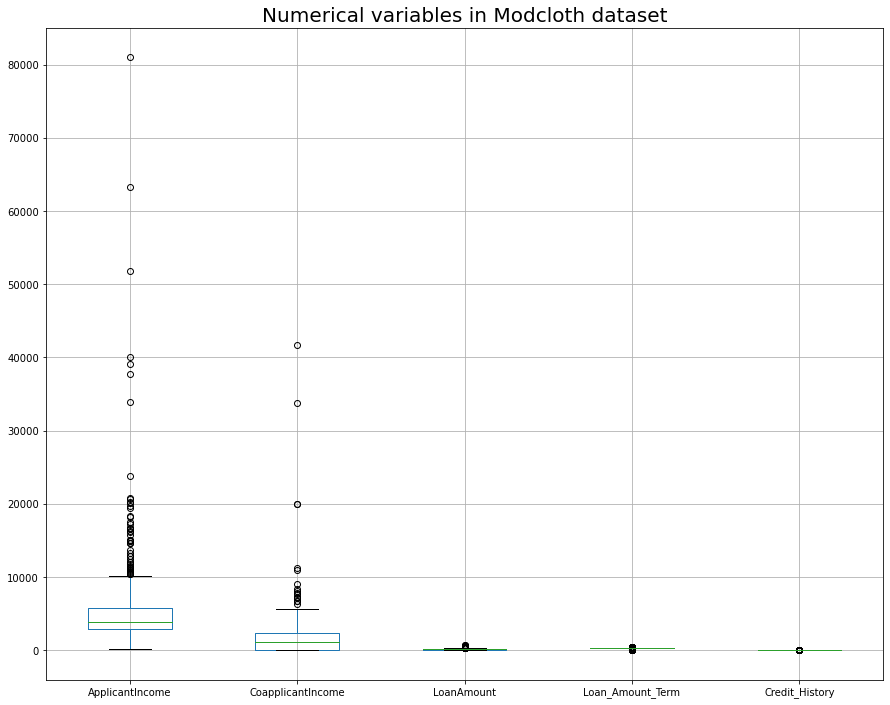

In [27]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(15,12))
loan_data[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

#### To undergo Correlation Analysis We convert categorical values of 'Loan Status' and 'Property Area' that would help to deal with missing values and outliers

In [169]:
#Loan Status Encoding
loan_data['Loan_Status'] = loan_data.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)
#Property Area Encoding
loan_data['Property_Area'] = loan_data['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

<function matplotlib.pyplot.show(*args, **kw)>

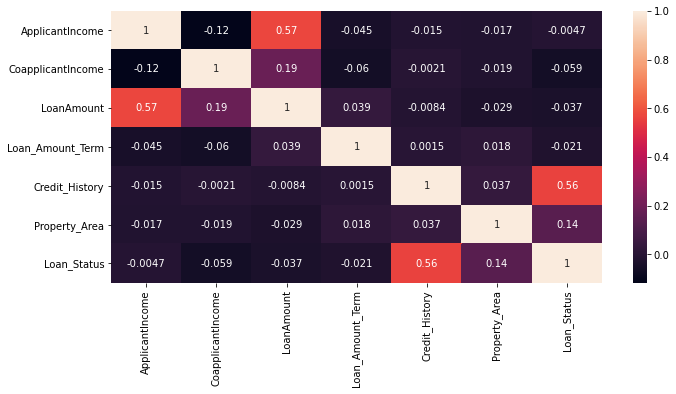

In [110]:
plt.subplots(figsize=(11,5))
sns.heatmap(loan_data.corr(),annot=True)
plt.show

### 2- Dealing the Missing Values

#### Classify on basis of Gender to calculate the Probability to deal with missing values of column "Gender"

In [19]:
male=round(loan_data[loan_data.Gender=='Male'].shape[0]/loan_data.shape[0],2)
female=round(loan_data[loan_data.Gender=='Female'].shape[0]/loan_data.shape[0],2)
gendersplit=loan_data[loan_data.Gender=='Male']
var1=round(gendersplit[gendersplit["Married"]=='Yes'].shape[0]/gendersplit["Married"].shape[0],2)
var2=round(gendersplit[gendersplit["Education"]=='Graduate'].shape[0]/gendersplit["Education"].shape[0],2)
var3=round(gendersplit[gendersplit["Self_Employed"]=='No'].shape[0]/gendersplit["Self_Employed"].shape[0],2)
gendersplit=loan_data[loan_data.Gender=='Female']
v1=round(gendersplit[gendersplit["Married"]=='Yes'].shape[0]/gendersplit["Married"].shape[0],2)
v2=round(gendersplit[gendersplit["Education"]=='Graduate'].shape[0]/gendersplit["Education"].shape[0],2)
v3=round(gendersplit[gendersplit["Self_Employed"]=='No'].shape[0]/gendersplit["Self_Employed"].shape[0],2)
print("probability of gender is male :", male)
print("probability of gender is female :", female)
print("probability of male who are married",var1)
print("probability of male who are graduated",var2)
print("probability of male who are not selfemployed",var3)
print("total probablity(male):",round(male*var1*var2*var3,2))
print("probability of female who are married",v1)
print("probability of female who are graduated",v2)
print("probability of female who are not selfemployed",v3)
print("total probablity(female):",round(female*v1*v2*v3,2))

probability of gender is male : 0.8
probability of gender is female : 0.18
probability of male who are married 0.73
probability of male who are graduated 0.77
probability of male who are not selfemployed 0.82
total probablity(male): 0.37
probability of female who are married 0.28
probability of female who are graduated 0.82
probability of female who are not selfemployed 0.79
total probablity(female): 0.03


#### From above stats we can dtermine that If a person is married,graduated and not self employed then the probability of being a male is high

In [111]:
t=loan_data[(loan_data.Married=='Yes') & (loan_data.Education=='Graduate') & (loan_data.Self_Employed=='No')]
t=t.Gender.fillna("Male")

In [112]:
loan_data.Gender.update(t)

#### Remaining missing values will be filled with 'Female'

In [113]:
t=loan_data["Gender"].fillna('Female')
loan_data["Gender"].update(t)

In [114]:
loan_data.fillna(loan_data[loan_data.Gender.isnull()].fillna("Female"),inplace=True)

#### We can fill missing values for married status using naive bayes

Probability of female who are married is 0.28 
Probability of male who are married is 0.73 
Using Naive bayes: 
Probability(Married/Female)=P(female/Married)*P(Married)/P(Female)
P(Married)=0.65 P(Female)=0.194
Probability(Married/Female)=0.28*0.65/0.194=0.93 which is a large value

In [170]:
t=loan_data[loan_data.Gender=='Female']
t=loan_data.Married.fillna("Yes")
loan_data['Married'].update(t)

In [171]:
t=loan_data[loan_data.Gender=='Male']
t=loan_data.Married.fillna("No")
loan_data['Married'].update(t)

#### We can see that missing values of Column:'Loan Amount' can be filled with either mode or median value

In [117]:
statistics.median(loan_data["LoanAmount"])
statistics.mode(loan_data["LoanAmount"])

120.0

#### Filling missing valus of Columns:'CoapplicantIncome','LoanAmount','Loan_Amount_Term' with the respective mean values

In [118]:
a=loan_data['CoapplicantIncome'].fillna(loan_data['CoapplicantIncome'].mean())
loan_data['CoapplicantIncome'].update(a)

In [119]:
b=loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())
loan_data["LoanAmount"].update(b)

In [120]:
c=loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mean())
loan_data["Loan_Amount_Term"].update(c)
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,1,1


#### I filled missing value of Columns:'Self_Employed' and 'Dependents' with there mode values as they are independent categorical variables.

In [39]:
loan_data[loan_data.Self_Employed=='No'].shape

(500, 13)

In [40]:
loan_data[loan_data.Self_Employed=='Yes'].shape

(82, 13)

In [121]:
t=loan_data.Self_Employed.fillna(statistics.mode(loan_data.Self_Employed))
loan_data.Self_Employed.update(t)

In [122]:
print(loan_data[loan_data.Dependents=='1'].shape)
print(loan_data[loan_data.Dependents=='0'].shape)
print("Therefore mode of Dependent column :",statistics.mode(loan_data.Dependents))

(102, 13)
(345, 13)
Therefore mode of Dependent column : 0


In [123]:
t=loan_data.Dependents.fillna(statistics.mode(loan_data.Dependents))
loan_data.Dependents.update(t)

In [124]:
t=loan_data[(loan_data.Credit_History==1) & (loan_data.Loan_Status=='Y')]
t=loan_data["Credit_History"].fillna(1)
loan_data["Credit_History"].update(t)

/Users/nishchal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [125]:
t=loan_data[(loan_data.Credit_History==0) & (loan_data.Loan_Status=='N')]
t=loan_data["Credit_History"].fillna(0)
loan_data["Credit_History"].update(t)

In [126]:
print(pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status']))

Loan_Status       0    1
Credit_History          
0.0              82    7
1.0             110  415


#### We cross check for the availability of missing values if any and as we see now our dataset has no missing values 

In [127]:
missmissing_data2 = pd.DataFrame({'total_missing': loan_data.isnull().sum(), 'perc_missing': (loan_data.isnull().sum()/614)*100})
missmissing_data2

,total_missing,perc_missing
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


### We use Label encoder to transform our categorical data into numeric to facilitate machine readability

In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [129]:
loan_data["Gender"]=le.fit_transform(loan_data["Gender"])
loan_data["Married"]=le.fit_transform(loan_data["Married"])
loan_data["Dependents"]=le.fit_transform(loan_data["Dependents"])
loan_data["Education"]=le.fit_transform(loan_data["Education"])
loan_data["Self_Employed"]=le.fit_transform(loan_data["Self_Employed"])
loan_data["Loan_Status"]=le.fit_transform(loan_data["Loan_Status"])

### 3- Visualising outliers using scatter plot

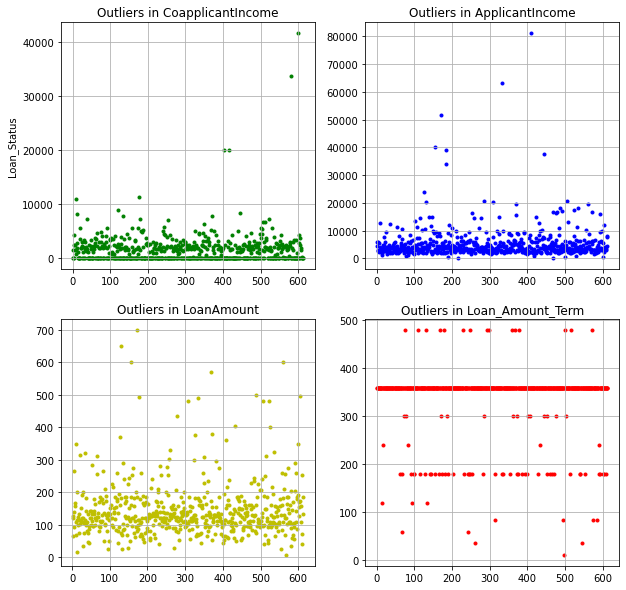

In [222]:
plt.figure(figsize=(10,10))
plt.subplot(222)
plt.scatter(loan_data.index,loan_data['ApplicantIncome'],color="b",marker = ".")
plt.title("Outliers in ApplicantIncome")
plt.grid()
plt.subplot(221)
plt.scatter(loan_data.index,loan_data['CoapplicantIncome'],color="g",marker = ".")
plt.ylabel("Loan_Status")
plt.title("Outliers in CoapplicantIncome")
plt.grid()
plt.subplot(223)
plt.scatter(loan_data.index,loan_data['LoanAmount'],color="y",marker = ".")
plt.title("Outliers in LoanAmount")
plt.grid()
plt.subplot(224)
plt.scatter(loan_data.index,loan_data['Loan_Amount_Term'],color="r",marker = ".")
plt.title("Outliers in Loan_Amount_Term")
plt.grid()
plt.show()

###  4-Dealing Outliers 

#### Using z-score method

In [224]:
def outlier(Feature):
    std = np.std(Feature)
    mean = np.mean(Feature)
    threshold = 3
    outliers = []
    for i in Feature:
        zscore = (i-mean)/std
        if zscore > threshold:
            outliers.append(i)
    print(outliers)
print("outliers in ApplicantIncome:")
outlier(loan_data["ApplicantIncome"])
print("outliers in CoapplicantIncome:")
outlier(loan_data["CoapplicantIncome"])
print("outliers in LoanAmount:")
outlier(loan_data["LoanAmount"])
print("outliers in Loan_Amount_Term:")
outlier(loan_data["Loan_Amount_Term"])

outliers in ApplicantIncome:
[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]
outliers in CoapplicantIncome:
[10968.0, 11300.0, 20000.0, 20000.0, 33837.0, 41667.0]
outliers in LoanAmount:
[650.0, 600.0, 700.0, 495.0, 436.0, 480.0, 490.0, 570.0, 405.0, 500.0, 480.0, 480.0, 600.0, 496.0]
outliers in Loan_Amount_Term:
[]


#### Using IQR method

In [226]:
#lower band outlier: q1-1.5*IQR
#upper band outlier: q3-1.5*IQR
def outlier(feature):
    q1,q3 = np.percentile(feature,(25,75))
    iqr = q3-q1
    print("IQR",iqr)
    print("Q1",q1)
    print("Q3",q3)
    upperbound = q3 + iqr*1.5
    lowerbound = q1 - iqr*1.5
    outliers = []
    for i in feature:
        if i < lowerbound or i > upperbound:
            outliers.append(i)
    print(outliers)
    return len(outliers)
print("Outliers in ApplicantIncome:")
outlier(loan_data['ApplicantIncome'])
print("Outliers in CoapplicantIncome:")
outlier(loan_data['CoapplicantIncome'])
print("Outliers in LoanAmount:")
outlier(loan_data['LoanAmount'])

Outliers in ApplicantIncome:
IQR 2917.5
Q1 2877.5
Q3 5795.0
[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]
Outliers in CoapplicantIncome:
IQR 2297.25
Q1 0.0
Q3 2297.25
[10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]
Outliers in LoanAmount:
IQR nan
Q1 nan
Q3 nan
[]


0

### Removing outliers is not preferable because the loan_dataset is very sensitive and Outliers can be very informative. There were many outliers values in applicant income who's loan status is yes and if we remove the outliers from the dataset the prediction done will be biased to those customers where some features values are coming as outliers.


#### We drop the column = "Loan id" as we dont need it for prediction

In [132]:
loan_data1=loan_data.drop(columns=['Loan_ID'])

#### Required classification libraries are to be imported from sciktlearn

In [133]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

#### We Exclude the dependent variable: Loan_status to use for dependency and classification

In [136]:
X = loan_data1.drop('Loan_Status', axis=1)
y = loan_data1.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=123)

In [137]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
round(accuracy_score(y_test,clf.predict(X_test)),2)

0.75

In [217]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 200)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#### We Scale the data

In [218]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5- Prediction

I used following models for prediction
1.Random Forest 
2.Naive Bayes
3.Logistic Regression
4.Decision Tree

In [219]:
from sklearn import metrics
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(cm,'\n')
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))

Confusion matrix:
[[18 13]
 [ 8 54]] 

Accuracy: 0.77


#### Naive Baye

In [214]:
model=GaussianNB()
model.fit(X_train,y_train)
round(accuracy_score(y_test,model.predict(X_test)),2)

0.81

#### logistic regression

In [215]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
round(accuracy_score(y_test,y_pred),2)

0.8

#### SVC

In [216]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
round(accuracy_score(y_test,clf.predict(X_test)),2)

0.8

#### Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 99)
classifier.fit(X_train, y_train)

#Training the decision tree classifier on the training dataset
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[17 14]
 [15 47]]


0.6881720430107527

### 6- Conclusion

### We predicted the values for the dependent variable Loan_Status in dataset on the basis of other independent features using four classification models out of which the accuracy of Naive Baye models comes out to be most accurate i.e., 81%